Amplitude=-0.008103952545832384, Angular freq.=0.017014781134414948, phase=1.4159241934587072, offset=6.147319729335323e-05, Max. Cov.=[[ 6.20195983e-08  1.89736968e-07 -1.33792691e-05 -3.71143869e-08]
 [ 1.89736968e-07  7.67951482e-07 -5.92176063e-05 -1.18085161e-07]
 [-1.33792691e-05 -5.92176063e-05  5.55768905e-03  4.09423547e-06]
 [-3.71143869e-08 -1.18085161e-07  4.09423547e-06  5.04991697e-08]]
Errore Amp
0.0002490373432217457
Errore freq
0.0008763284098384251
Errore phase
0.07454990979845089
Errore offset
0.0002247202031587883


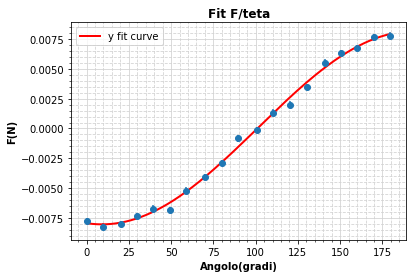

MinAngle
100.98444933912327
Amplitude=0.008395304067180077, Angular freq.=0.01734167403287482, phase=0.8482068887614833, offset=-0.000259112493078411, Max. Cov.=[[ 1.31448938e-07 -2.45560306e-07  1.26652178e-05 -1.43004399e-07]
 [-2.45560306e-07  5.25899498e-07 -3.01551237e-05  2.80294248e-07]
 [ 1.26652178e-05 -3.01551237e-05  2.00586786e-03 -1.44530020e-05]
 [-1.43004399e-07  2.80294248e-07 -1.44530020e-05  1.63666462e-07]]
Errore Amp
0.00036255887515865363
Errore freq
0.0007251892842350352
Errore phase
0.04478691613426102
Errore offset
0.00040455711880600876


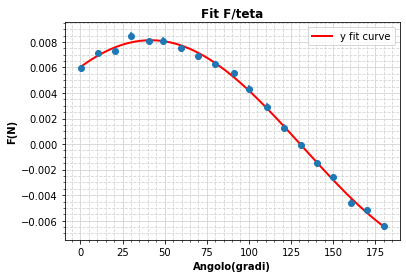

MinAngle
130.45977074581248
Amplitude=-0.008071617077018575, Angular freq.=0.017516510696325375, phase=-0.40045346984248836, offset=2.987292479745557e-05, Max. Cov.=[[ 6.65911022e-09  7.23724797e-09 -2.10572045e-06  3.79753571e-09]
 [ 7.23724797e-09  3.14984775e-08 -9.23478809e-06  1.36545270e-08]
 [-2.10572045e-06 -9.23478809e-06  2.78755019e-03 -4.04215951e-06]
 [ 3.79753571e-09  1.36545270e-08 -4.04215951e-06  8.52201110e-09]]
Errore Amp
8.160337136464783e-05
Errore freq
0.0001774781042549424
Errore phase
0.05279725549458133
Errore offset
9.231473934086507e-05


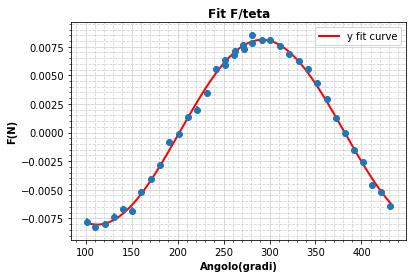

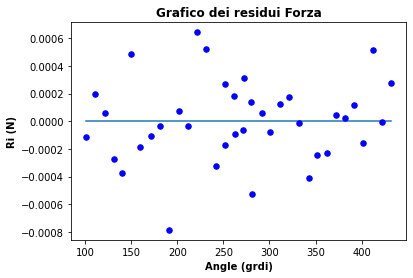

sigma_post_fit
0.0002992088148390375


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "cov": pcov, "rawres": (guess,popt,pcov)}


F = np.array([0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0,-0.001405855646,-0.00276899508,-0.004048,-0.005204008488,-0.006201895811,-0.007011341669,-0.007607751458,-0.007973003568])

F2 = np.array([0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0,-0.001405855646,-0.00276899508,-0.004048,-0.005204008488,-0.006201895811])
F = F*-1
#sto considerando un errore di 0.014*2 forse è da mettere 0.03*2 ma poi il grafico
#viene sballato, e non sono errori massimi da dividere per 3 ma sigma visto
#che sono ricavati dalle sigma post_fit della taratura, quindi forse l'errore
#che ci dobbiamo aspettare è di 0.014 su ogni misura
F = F-np.random.normal(0, 0.028*0.0098, 19)
#per il fit aggiungere F qui sotto decommentando
#F = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.ones(19)*0.0002744
Angle = np.arange(0,181,10)
#per il fit commentare questa riga
Angle = Angle-np.random.normal(0, 0.5, 19)
Angle_err = np.ones(19)*0.5


fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='lightgray', linestyle='--')
plt.errorbar(Angle, F, xerr=Angle_err, yerr=F_err, fmt='o')





res = fit_sin(Angle, F)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

x = np.linspace(min(Angle),max(Angle),10000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()
phi_set1 = res["phase"]

MinAngle = 360
MinValue = 100
for i in range(10000):
  if(np.abs(res["fitfunc"](x[i])) < MinValue):
    MinValue = np.abs(res["fitfunc"](x[i]))
    MinAngle = x[i]

MinAngle =  MinAngle
print("MinAngle")
print(MinAngle)

#per il fit commentare le prossime 2 righe
#F2 = F*-1
F2 = F2-np.random.normal(0, 0.028*0.0098, 19)
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.ones(19)*0.0002744
Angle2 = np.arange(0,181,10)
#per il fit commentare questa riga
Angle2 = Angle2-np.random.normal(0, 0.5, 19)
Angle_err = np.ones(19)*0.5
res = fit_sin(Angle2, F2)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])


fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='lightgray', linestyle='--')
plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.errorbar(Angle2, F2, xerr=Angle_err, yerr=F_err, fmt='o')


x = np.linspace(min(Angle2),max(Angle2),10000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

phi_set2 = res["phase"]

MinAngle2 = 360
MinValue = 100
for i in range(10000):
  if(np.abs(res["fitfunc"](x[i])) < MinValue):
    MinValue = np.abs(res["fitfunc"](x[i]))
    MinAngle2 = x[i]

MinAngle2 = MinAngle2
print("MinAngle")
print(MinAngle2)

Ftot = np.concatenate([F,F2])
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
F_err = np.concatenate([F_err,F_err])
#per il fit commentare questa riga

#RICUCITURA

#Angle = Angle - 360*phi_set1/2/np.pi
#Angle2 = Angle2 - 360*phi_set2/2/np.pi

Angle = Angle + MinAngle
Angle2 = Angle2 + 180+MinAngle*2-MinAngle2

Angletot = np.concatenate([Angle,Angle2])
Angle_err = np.ones(38)*0.5

res = fit_sin(Angletot, Ftot)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])
print("Errore offset")
print(err[3])

fig = plt.figure()
ax = fig.gca()

plt.title("Fit F/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")
plt.minorticks_on()
plt.grid(b=True, which='minor', color='lightgray', linestyle='--')
plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.errorbar(Angletot, Ftot, xerr=Angle_err, yerr=F_err, fmt='o')


x = np.linspace(min(Angletot),max(Angletot),1000)
A = res["amp"]
phi = res["phase"]
c = res["offset"]
w = res["omega"]


Ff = res["fitfunc"](Angletot)
plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)

plt.legend(loc="best")
plt.show()





Ri = Ff-Ftot

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Forza",fontweight="bold")
plt.xlabel("Angle (grdi)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(np.linspace(min(Angletot),max(Angletot),1000),np.zeros(1000))
plt.scatter(Angletot,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ff-Ftot)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

